In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from autoencoderhandler import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(-0.5, 255.5, 255.5, -0.5)

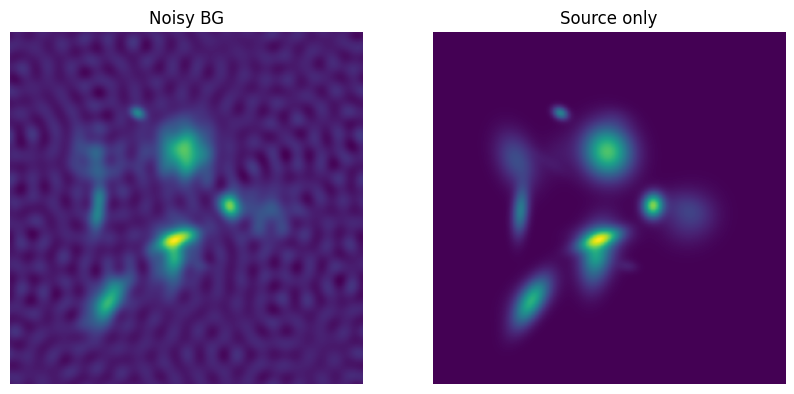

In [11]:

image, image_forground = create_image()

# Display the image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Noisy BG')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_forground)
plt.title('Source only')
plt.axis('off')


In [3]:

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
# Model, loss, and optimizer
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Dataset and DataLoader setup
num_train_images = 1000  # Specify how many images you want for training
train_dataset = DynamicImageDataset(num_train_images)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Train the model
train(model, train_loader, epochs=5, device=device, criterion=criterion, optimizer=optimizer)

Using device: cuda
Epoch 1, Loss: 0.387227944098413
Epoch 2, Loss: 0.3482059072703123
Epoch 3, Loss: 0.33136566635221243
Epoch 4, Loss: 0.3349552610889077
Epoch 5, Loss: 0.3311011390760541


In [4]:
model

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (9): ReLU()
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=16384, out_features=12, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=12, out_features=16384, bias=True)
    (1): Unflatten(dim=1, unflattened_size=(256, 8, 8))
    (2): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): ReLU()
 

[tensor([[[-0.0337, -0.0440, -0.0512,  ...,  0.0047, -0.0081, -0.0213],
          [-0.0194, -0.0300, -0.0379,  ...,  0.0168,  0.0053, -0.0073],
          [-0.0038, -0.0141, -0.0223,  ...,  0.0286,  0.0187,  0.0075],
          ...,
          [-0.0538, -0.0605, -0.0637,  ..., -0.0207, -0.0327, -0.0442],
          [-0.0519, -0.0603, -0.0650,  ..., -0.0152, -0.0282, -0.0409],
          [-0.0450, -0.0545, -0.0606,  ..., -0.0065, -0.0197, -0.0330]]]),
 tensor([[[1.4475e-42, 4.0091e-42, 1.1011e-41,  ..., 1.1221e-20,
           7.5794e-21, 5.0842e-21],
          [2.8068e-42, 7.7702e-42, 2.1331e-41,  ..., 2.2239e-20,
           1.5021e-20, 1.0076e-20],
          [5.4090e-42, 1.4966e-41, 4.1072e-41,  ..., 4.3768e-20,
           2.9564e-20, 1.9831e-20],
          ...,
          [3.2230e-44, 8.4078e-44, 2.1720e-43,  ..., 9.8591e-13,
           6.7035e-13, 4.5338e-13],
          [2.3822e-44, 6.1657e-44, 1.5695e-43,  ..., 6.5431e-13,
           4.4473e-13, 3.0068e-13],
          [1.6816e-44, 4.3440e

In [25]:
model.eval()


image_test, image_forground_test = train_dataset.__getitem__(0)

with torch.no_grad():
    image_test = image_test.to(device)
    output = model(image_test)
    output = output.squeeze(0).cpu().numpy()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_test.squeeze(0).cpu().numpy())
plt.title('Noisy BG')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(output)
plt.title('Reconstructed')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_forground_test)
plt.title('Source only')
plt.axis('off')


RuntimeError: mat1 and mat2 shapes cannot be multiplied (256x64 and 16384x12)